# functions 

- can return a value
- can contain parameter asking which is asking for an argument when called. Can have a default value to fall back on
- arguement is what is put in the () when calling the function, if nothing is put in the default value is used

In [3]:
def squarer(x):
    return x**2

squarer(2)

4

In [3]:
square = squarer(5)
square

25

In [4]:
[squarer(x) for x in range (10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

default value

In [11]:
def say_hello(name = "friend"):
    print(f"Hi {name}!")

say_hello("Bella")

Hi Bella!


In [14]:
def smallest(number1, number2):
    if number1 > number2:
        return number2
    return number1

smallest(1,5), smallest(7,-6)


(1, -6)

## Keyword argument

- Can be used in different order by reffering to the key

In [15]:
def count_words(text):
    words = text.split()
    return len(words)

count_words(text="I stand on the shoulders of giants")

7

## arbitrary arguments

- The amount of items can vary

In [16]:
def my_mean(*numbers):
    print(numbers)

my_mean(1, 2 ,3)

(1, 2, 3)


In [17]:
def my_mean(*numbers):
    sum_ = 0
    for number in numbers:
        sum_ += number
    return sum_/len(numbers)

my_mean(23, 56, 79, 2)

40.0

## unpacking arguments

In [ ]:
def say_hello(name, age):
    print(f"Hi {name} you are {age} years old")

pet = ("Bella", 4)

#unpacks the tuple with *
say_hello(*pet)

Hi Bella you are 4 years old


## lambda function inside a function

In [35]:
def extract_data(filename):
    with open(filename, "r") as file:
        data = file.readlines()
        
    years, it, economy = data
    clean_row = lambda row: [int (item) for item in row.strip().split(",")[1:]]
    years = clean_row(years)
    it = clean_row(it)
    economy = clean_row(economy)

    return years, it, economy

extract_data("data/students_yh_it_economy.txt")

([2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021,
  2022,
  2023,
  2024],
 [2587,
  2546,
  2797,
  2817,
  2857,
  2903,
  3160,
  3398,
  4054,
  4937,
  5812,
  6183,
  6210,
  5704,
  7086,
  10283,
  12852,
  14255,
  15162,
  16447],
 [6238,
  7582,
  8807,
  10264,
  11286,
  11905,
  12179,
  11946,
  12253,
  12261,
  11670,
  11529,
  12193,
  13797,
  15994,
  18491,
  18540,
  17818,
  17354,
  17380])

## variable number of keyword arguments **kwargs

In [37]:
def test_kwargs(**kwargs):
    print(kwargs)
    print(kwargs.get("type"))

test_kwargs(x = 5, name = "Bella", type = "rabbit")

{'x': 5, 'name': 'Bella', 'type': 'rabbit'}
rabbit


<Axes: title={'center': 'Number of students in it'}, xlabel='year', ylabel='number of students'>

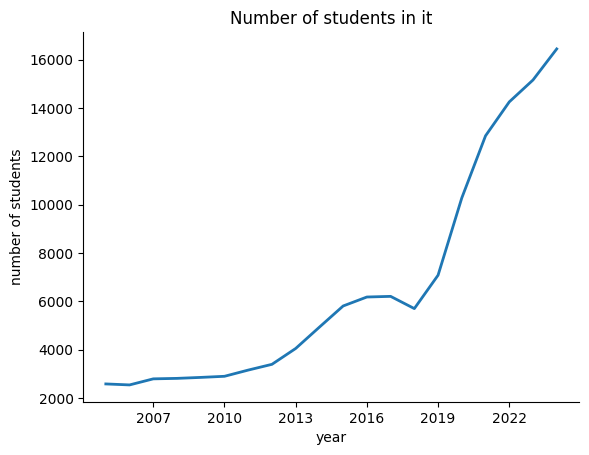

In [49]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

years, it, economy = extract_data("data/students_yh_it_economy.txt")
fig, ax = plt.subplots(1)


def plot_data(ax, x, y, **options):
    ax.plot(x, y, linewidth=options.get("linewidth", 3))
    ax.set(
        xlabel=options.get("xlabel"),
        ylabel=options.get("ylabel"),
        title=options.get("title"),
    )
    ax.xaxis.set_major_locator(MaxNLocator(integer = True))
    ax.spines[["top", "right"]].set_visible(False)

    return ax


plot_data(
    ax,
    x=years,
    y=it,
    linewidth=2,
    title="Number of students in it",
    xlabel="year",
    ylabel="number of students",
)

<Axes: title={'center': 'Number of students in economy'}, xlabel='year', ylabel='number of students'>

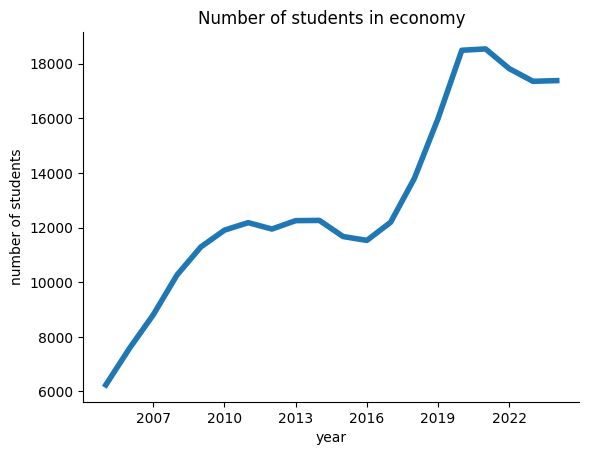

In [50]:
fig, ax = plt.subplots(1)

plot_data(
    ax,
    x=years,
    y=economy,
    linewidth=4,
    title="Number of students in economy",
    xlabel="year",
    ylabel="number of students",
)